**Nama : Rafa Fadil Aras**

**NIM : 2341720007**

**Kelas : TI-3G**

# **Jobsheet 14 : Convolutional Neural Network**

## **Praktikum 1 : Klasifikasi Cat vs. Dog**

### **Langkah 1 - Import Library**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Langkah 2 - Pra Pengolahan Data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Machine Learning/JS14/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Langkah 2.1. Pra Pengolahan Data Training**

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(path + '/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


#### **Langkah 2.2. Pra Pengolahan Data Testing**

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(path + '/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### **Langkah 3 - Pembuatan Model CNN**

#### **Langkah 3.1.  - Inisiasi Model CNN**

In [13]:
cnn = tf.keras.models.Sequential()

#### **Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Langkah 3.3 - Pembuatan Layer Pooling 1**

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### **Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### **Langkah 3.5 - Flattening**

In [17]:
cnn.add(tf.keras.layers.Flatten())

#### **Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [18]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### **Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [19]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### **Langkah 3.8 - Compile Model CNN**

In [20]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Langkah 4 - Fit CNN**

In [21]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1598s 6s/step - accuracy: 0.5609 - loss: 0.6874 - val_accuracy: 0.5510 - val_loss: 0.6998
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 379ms/step - accuracy: 0.6739 - loss: 0.6022 - val_accuracy: 0.7435 - val_loss: 0.5393
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 378ms/step - accuracy: 0.7129 - loss: 0.5576 - val_accuracy: 0.7580 - val_loss: 0.5079
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 379ms/step - accuracy: 0.7407 - loss: 0.5229 - val_accuracy: 0.6605 - val_loss: 0.6726
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 375ms/step - accuracy: 0.7542 - loss: 0.4964 - val_accuracy: 0.7710 - val_loss: 0.4963
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 377ms/step - accuracy: 0.7612 - loss: 0.4907 - val_accuracy: 0.7590 - val_loss: 0.5108
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 392ms/step - accuracy: 0.7785 - loss: 0.4566 - val_accuracy: 0.7850 - val_loss: 0.4758
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 378ms/step - accuracy: 0.7878 - loss: 0.

### **Langkah 5 - Prediksi dengan 1 Citra**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Hasil Prediksi: dog


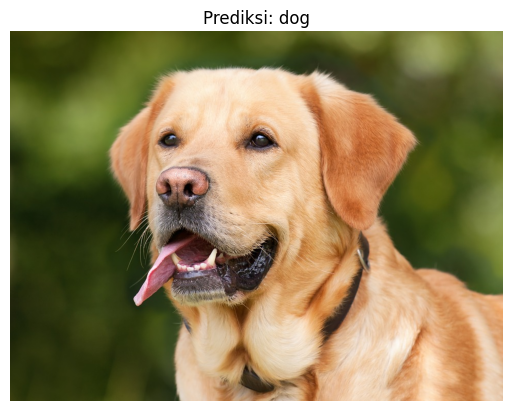

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine Learning/JS14/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

# Print hasil prediksi
print("Hasil Prediksi:", prediction)

# Tampilkan gambar
plt.imshow(image.load_img(img_path))
plt.title("Prediksi: " + prediction)
plt.axis('off')
plt.show()